Matplotlib is building the font cache; this may take a moment.


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/10


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 804s 4s/step - accuracy: 0.8373 - loss: 0.5157 - val_accuracy: 0.9861 - val_loss: 0.0400
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 9:03 2s/step - accuracy: 0.9375 - loss: 0.1040

C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9375 - loss: 0.1040 - val_accuracy: 0.9167 - val_loss: 0.3115
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 694s 3s/step - accuracy: 0.9674 - loss: 0.0867 - val_accuracy: 0.9931 - val_loss: 0.0288
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 0.0373 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 677s 3s/step - accuracy: 0.9826 - loss: 0.0528 - val_accuracy: 0.9931 - val_loss: 0.0155
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9688 - loss: 0.1175 - val_accuracy: 1.0000 - val_loss: 3.3788e-04
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 672s 3s/step - accuracy: 0.9843 - loss: 0.0464 - val_accuracy: 0.9942 - val_loss: 0.0138
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9688 - loss: 0.0584 - val_accuracy: 0.9167 - val_loss: 0.0649
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 674s 3s/step - accuracy: 0.9874 - loss: 0.0368 - val_accuracy: 0.993

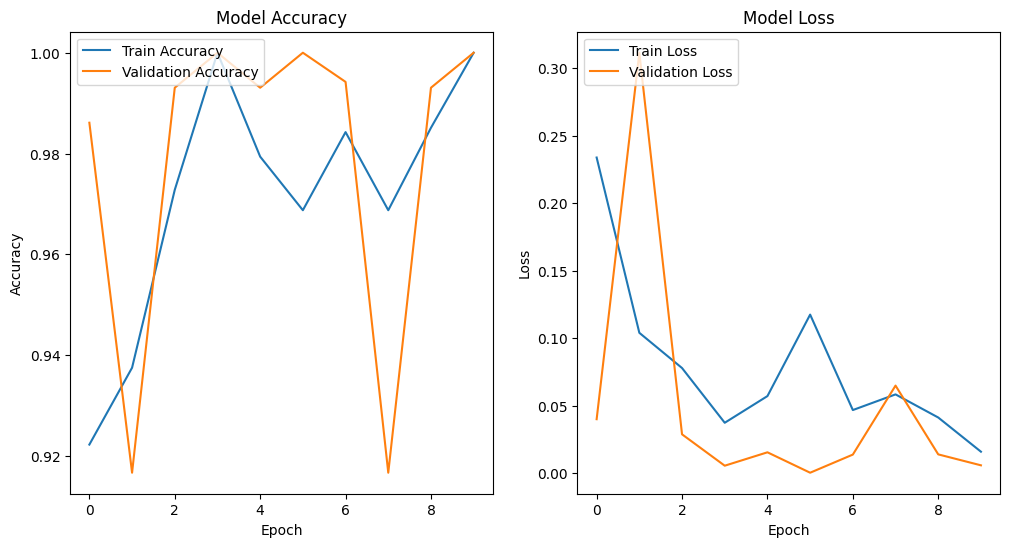

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.9987 - loss: 0.0047
Test Loss: 0.008352978155016899, Test Accuracy: 0.9977
28/28 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step


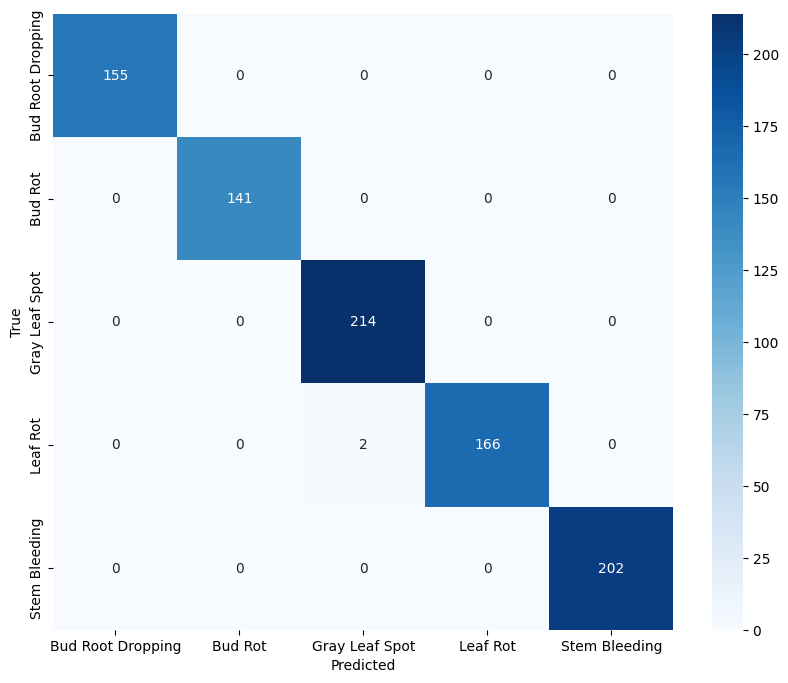

                   precision    recall  f1-score   support

Bud Root Dropping       1.00      1.00      1.00       155
          Bud Rot       1.00      1.00      1.00       141
   Gray Leaf Spot       0.99      1.00      1.00       214
         Leaf Rot       1.00      0.99      0.99       168
    Stem Bleeding       1.00      1.00      1.00       202

         accuracy                           1.00       880
        macro avg       1.00      1.00      1.00       880
     weighted avg       1.00      1.00      1.00       880



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir =  r"C:\Users\usern\OneDrive\Desktop\divide\train"
test_dir = r"C:\Users\usern\OneDrive\Desktop\divide\test"
validation_dir =  r"C:\Users\usern\OneDrive\Desktop\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ideal for multi-class classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Print training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')

# Print validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix and Classification Report
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.8636 - loss: 0.3895 - val_accuracy: 0.9803 - val_loss: 0.0715
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 5:55 2s/step - accuracy: 0.9688 - loss: 0.1394

C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9688 - loss: 0.1394 - val_accuracy: 0.9167 - val_loss: 0.2132
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - accuracy: 0.9729 - loss: 0.0824 - val_accuracy: 0.9907 - val_loss: 0.0215
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 3.5433e-04
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.9810 - loss: 0.0585 - val_accuracy: 0.9850 - val_loss: 0.0568
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.2571 - val_accuracy: 1.0000 - val_loss: 3.2308e-04
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 471s 2s/step - accuracy: 0.9803 - loss: 0.0546 - val_accuracy: 0.9942 - val_loss: 0.0156
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9688 - loss: 0.2908 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.9834 - loss: 0.0509 - val_accuracy: 0

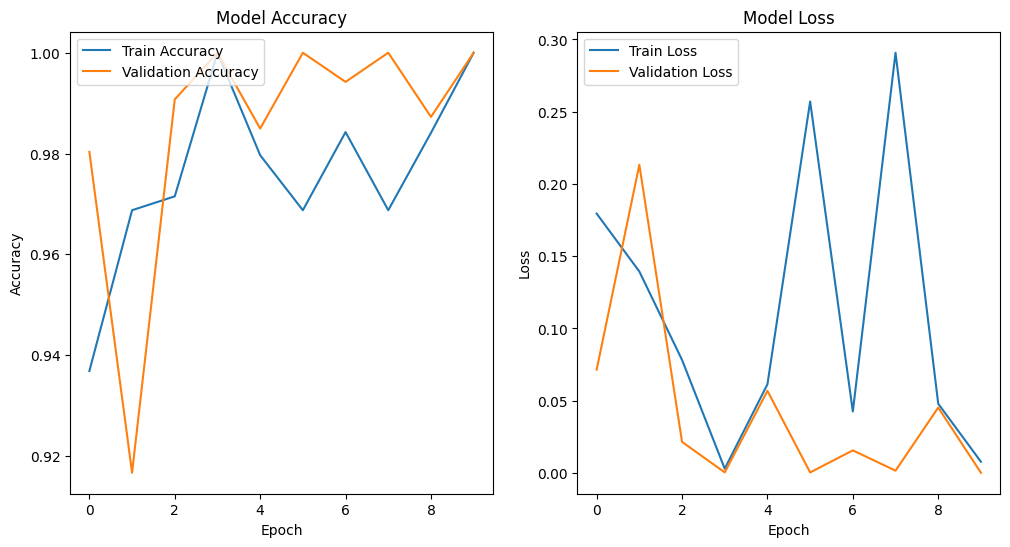

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9931 - loss: 0.0165
Test Loss: 0.019755743443965912, Test Accuracy: 0.9920
28/28 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step


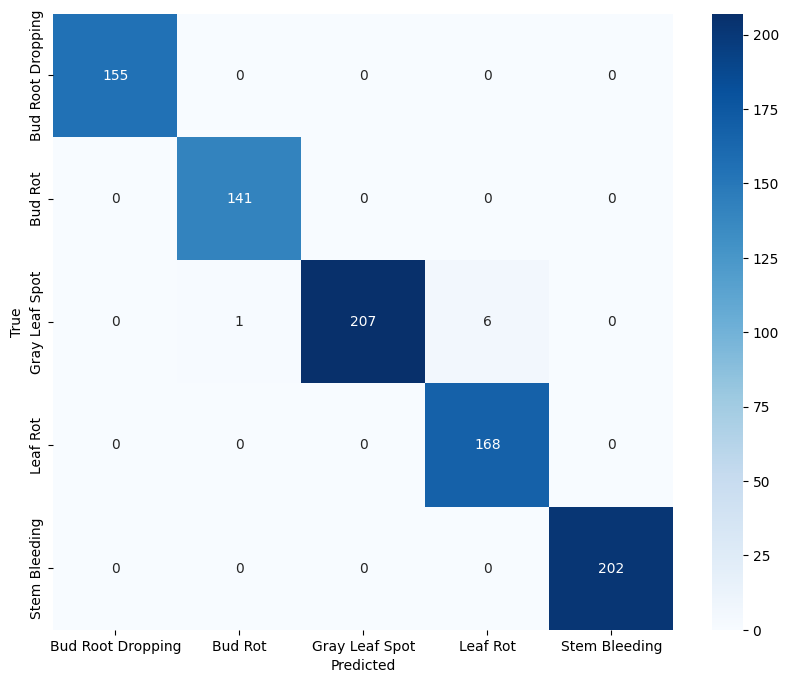

                   precision    recall  f1-score   support

Bud Root Dropping       1.00      1.00      1.00       155
          Bud Rot       0.99      1.00      1.00       141
   Gray Leaf Spot       1.00      0.97      0.98       214
         Leaf Rot       0.97      1.00      0.98       168
    Stem Bleeding       1.00      1.00      1.00       202

         accuracy                           0.99       880
        macro avg       0.99      0.99      0.99       880
     weighted avg       0.99      0.99      0.99       880



In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\usern\OneDrive\Desktop\divide\train"
test_dir = r"C:\Users\usern\OneDrive\Desktop\divide\test"
validation_dir = r"C:\Users\usern\OneDrive\Desktop\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256),
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ideal for multi-class classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Print training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')

# Print validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix and Classification Report
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
Epoch 1/10


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 637s 3s/step - accuracy: 0.8821 - loss: 0.3547 - val_accuracy: 0.9734 - val_loss: 0.0854
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 8:35 2s/step - accuracy: 0.9688 - loss: 0.2968

C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9688 - loss: 0.2968 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 640s 3s/step - accuracy: 0.9722 - loss: 0.0741 - val_accuracy: 0.9942 - val_loss: 0.0279
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9688 - loss: 0.1007 - val_accuracy: 0.9167 - val_loss: 0.3081
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 634s 3s/step - accuracy: 0.9806 - loss: 0.0545 - val_accuracy: 0.9931 - val_loss: 0.0154
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9375 - loss: 0.0736 - val_accuracy: 1.0000 - val_loss: 1.6863e-04
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 652s 3s/step - accuracy: 0.9854 - loss: 0.0401 - val_accuracy: 0.9942 - val_loss: 0.0113
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.9167 - val_loss: 0.1265
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 628s 3s/step - accuracy: 0.9844 - loss: 0.0439 - val_accuracy: 0.990

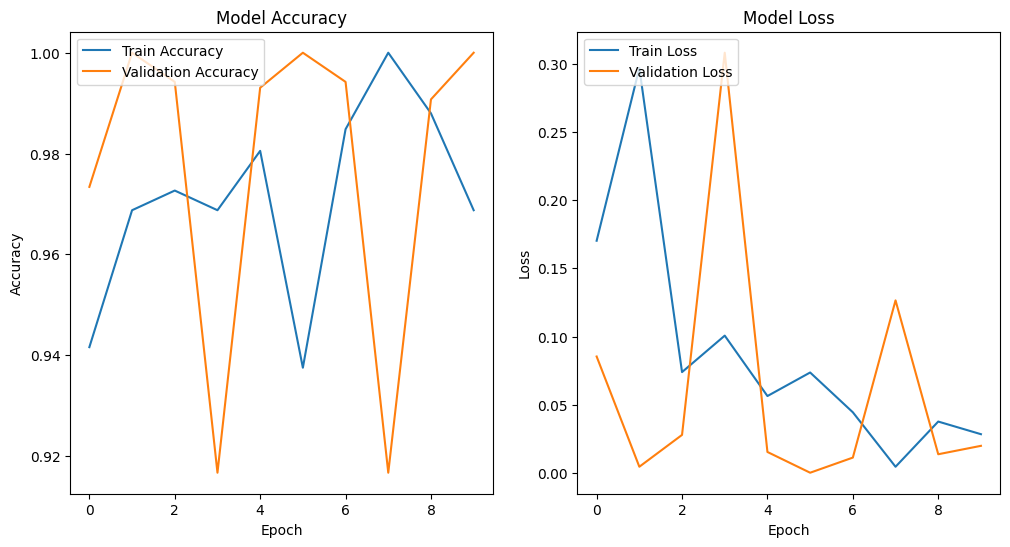

Training Accuracy: 0.9688
Validation Accuracy: 1.0000
Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9975 - loss: 0.0068
Test Loss: 0.011028558947145939, Test Accuracy: 0.9955
28/28 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step


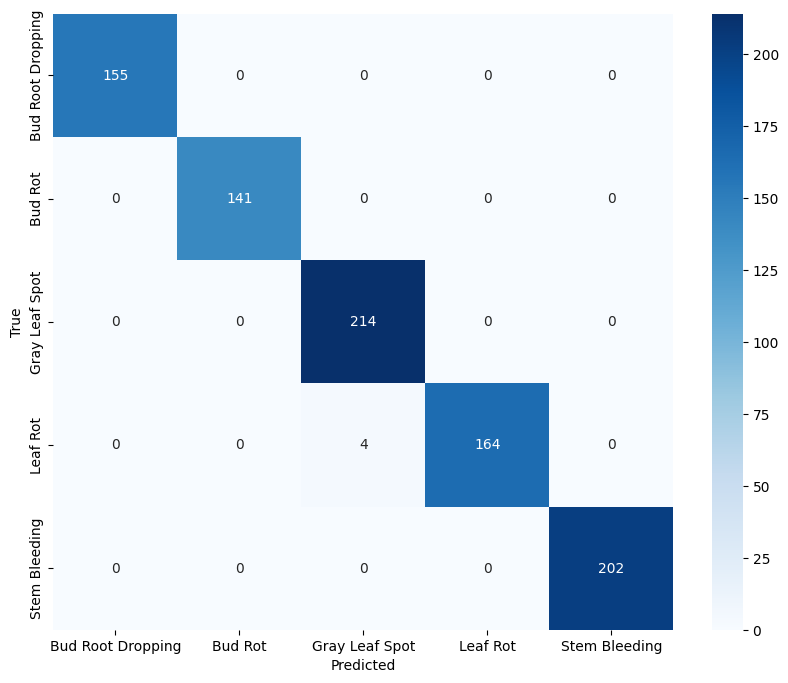

                   precision    recall  f1-score   support

Bud Root Dropping       1.00      1.00      1.00       155
          Bud Rot       1.00      1.00      1.00       141
   Gray Leaf Spot       0.98      1.00      0.99       214
         Leaf Rot       1.00      0.98      0.99       168
    Stem Bleeding       1.00      1.00      1.00       202

         accuracy                           1.00       880
        macro avg       1.00      1.00      1.00       880
     weighted avg       1.00      1.00      1.00       880



In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\usern\OneDrive\Desktop\divide\train"
test_dir = r"C:\Users\usern\OneDrive\Desktop\divide\test"
validation_dir = r"C:\Users\usern\OneDrive\Desktop\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256),
    Activation('swish'),  # Swish activation
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ideal for multi-class classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Print training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')

# Print validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix and Classification Report
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Found 7016 images belonging to 5 classes.
Found 876 images belonging to 5 classes.
Epoch 1/10


C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - accuracy: 0.8729 - loss: 0.4046 - val_accuracy: 0.9919 - val_loss: 0.0442
Epoch 2/10
  1/219 ━━━━━━━━━━━━━━━━━━━━ 5:55 2s/step - accuracy: 0.9688 - loss: 0.0890

C:\Users\usern\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9688 - loss: 0.0890 - val_accuracy: 1.0000 - val_loss: 1.5110e-04
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.9734 - loss: 0.0897 - val_accuracy: 0.9931 - val_loss: 0.0169
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0228 - val_accuracy: 1.0000 - val_loss: 0.0152
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.9789 - loss: 0.0577 - val_accuracy: 0.9907 - val_loss: 0.0310
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 5.5828e-06
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.9814 - loss: 0.0474 - val_accuracy: 0.9931 - val_loss: 0.0145
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 2.3126e-04
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.9832 - loss: 0.0539 - val_accurac

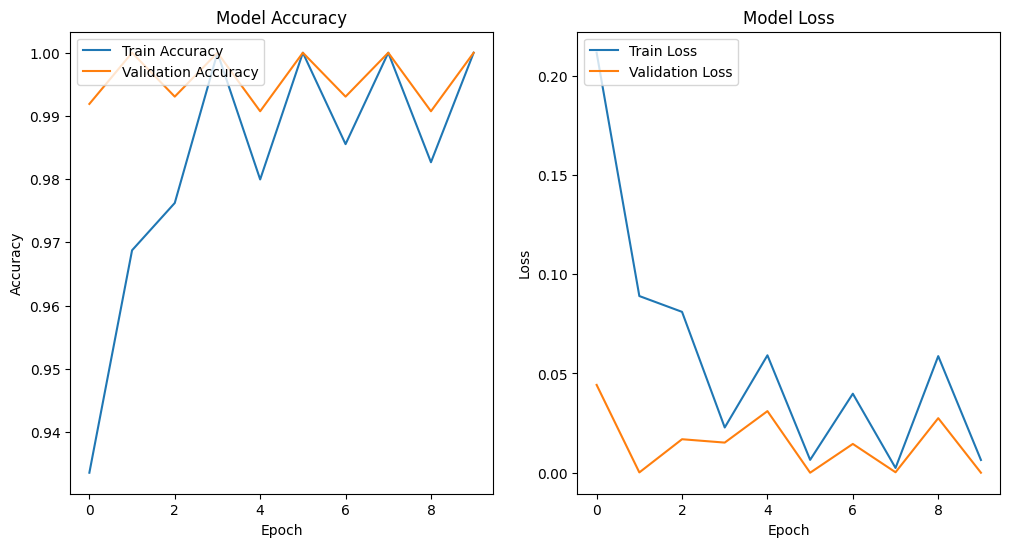

Training Accuracy: 1.0000
Validation Accuracy: 1.0000
Found 880 images belonging to 5 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9978 - loss: 0.0051
Test Loss: 0.010269897989928722, Test Accuracy: 0.9955
28/28 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


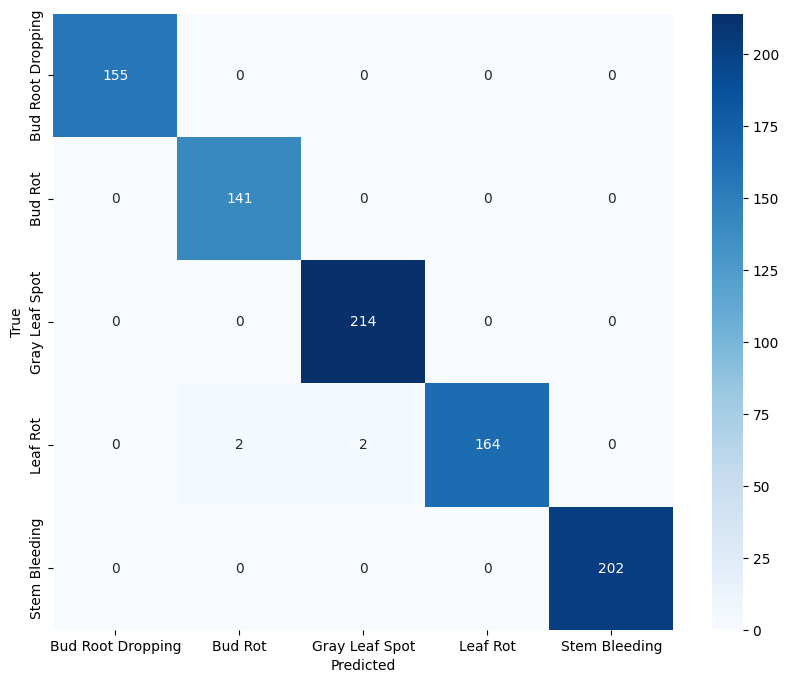

                   precision    recall  f1-score   support

Bud Root Dropping       1.00      1.00      1.00       155
          Bud Rot       0.99      1.00      0.99       141
   Gray Leaf Spot       0.99      1.00      1.00       214
         Leaf Rot       1.00      0.98      0.99       168
    Stem Bleeding       1.00      1.00      1.00       202

         accuracy                           1.00       880
        macro avg       1.00      1.00      1.00       880
     weighted avg       1.00      1.00      1.00       880



In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Activation, ELU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Directories
train_dir = r"C:\Users\usern\OneDrive\Desktop\divide\train"
test_dir = r"C:\Users\usern\OneDrive\Desktop\divide\test"
validation_dir = r"C:\Users\usern\OneDrive\Desktop\divide\val"

# Data Generators
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

# Data Generators Flow From Directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256),
    ELU(alpha=1.0),  # ELU activation
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ideal for multi-class classification
])

# Freeze the base model during the first training phase
base_model.trainable = False

# Compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Adjust based on your dataset size and model's performance
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Print training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'Training Accuracy: {train_accuracy:.4f}')

# Print validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Evaluation
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix and Classification Report
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)
